# Exploratory Data Analysis

### Here we imported the tools we needed to work with the data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("netflix1.csv")
df2 = pd.read_csv("Netflix_Dataset_Movie.csv")
df3 = pd.read_csv("Netflix_Dataset_Rating.csv")

### Seeing what our data looks like.

In [3]:
df2.head()

,Movie_ID,Year,Name
0,1,2003,Dinosaur Planet
1,2,2004,Isle of Man TT 2004 Review
2,3,1997,Character
3,4,1994,Paula Abdul's Get Up & Dance
4,5,2004,The Rise and Fall of ECW


In [4]:
df3.head()

,User_ID,Rating,Movie_ID
0,712664,5,3
1,1331154,4,3
2,2632461,3,3
3,44937,5,3
4,656399,4,3


In [5]:
df_ratings = df2.merge(df3)

In [6]:
df_ratings.head()

,Movie_ID,Year,Name,User_ID,Rating
0,3,1997,Character,712664,5
1,3,1997,Character,1331154,4
2,3,1997,Character,2632461,3
3,3,1997,Character,44937,5
4,3,1997,Character,656399,4


In [7]:
df.head()

,show_id,type,title,director,country,date_added,release_year,rating,duration,listed_in
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,United States,9/25/2021,2020,PG-13,90 min,Documentaries
1,s3,TV Show,Ganglands,Julien Leclercq,France,9/24/2021,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act..."
2,s6,TV Show,Midnight Mass,Mike Flanagan,United States,9/24/2021,2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries"
3,s14,Movie,Confessions of an Invisible Girl,Bruno Garotti,Brazil,9/22/2021,2021,TV-PG,91 min,"Children & Family Movies, Comedies"
4,s8,Movie,Sankofa,Haile Gerima,United States,9/24/2021,1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies"


In [8]:
df_ratings = df_ratings.rename(columns={"Name": "title", "Rating": "user_rating"})
df = pd.merge(df, df_ratings)

In [9]:
df.head()

,show_id,type,title,director,country,date_added,release_year,rating,duration,listed_in,Movie_ID,Year,User_ID,user_rating
0,s42,Movie,Jaws,Steven Spielberg,United States,9/16/2021,1975,PG,124 min,"Action & Adventure, Classic Movies, Dramas",798,1975,1943087,2
1,s42,Movie,Jaws,Steven Spielberg,United States,9/16/2021,1975,PG,124 min,"Action & Adventure, Classic Movies, Dramas",798,1975,2423875,4
2,s42,Movie,Jaws,Steven Spielberg,United States,9/16/2021,1975,PG,124 min,"Action & Adventure, Classic Movies, Dramas",798,1975,1734805,4
3,s42,Movie,Jaws,Steven Spielberg,United States,9/16/2021,1975,PG,124 min,"Action & Adventure, Classic Movies, Dramas",798,1975,364518,4
4,s42,Movie,Jaws,Steven Spielberg,United States,9/16/2021,1975,PG,124 min,"Action & Adventure, Classic Movies, Dramas",798,1975,1392773,4


In [10]:
df[df.isnull()].count()

show_id         0
type            0
title           0
director        0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
Movie_ID        0
Year            0
User_ID         0
user_rating     0
dtype: int64

In [11]:
df.drop(["show_id", "Movie_ID", "Year"], axis=1, inplace=True)

In [12]:
df["is_movie"] = [1 if i=="Movie" else 0 for i in df["type"]]


In [13]:
df.drop("type", axis=1, inplace=True)

In [14]:
df.head()

,title,director,country,date_added,release_year,rating,duration,listed_in,User_ID,user_rating,is_movie
0,Jaws,Steven Spielberg,United States,9/16/2021,1975,PG,124 min,"Action & Adventure, Classic Movies, Dramas",1943087,2,1
1,Jaws,Steven Spielberg,United States,9/16/2021,1975,PG,124 min,"Action & Adventure, Classic Movies, Dramas",2423875,4,1
2,Jaws,Steven Spielberg,United States,9/16/2021,1975,PG,124 min,"Action & Adventure, Classic Movies, Dramas",1734805,4,1
3,Jaws,Steven Spielberg,United States,9/16/2021,1975,PG,124 min,"Action & Adventure, Classic Movies, Dramas",364518,4,1
4,Jaws,Steven Spielberg,United States,9/16/2021,1975,PG,124 min,"Action & Adventure, Classic Movies, Dramas",1392773,4,1


In [15]:
duration = []
for i in range(len(df)):
    if df["is_movie"].iloc[i]==1:
        duration.append(int(df["duration"].iloc[i][:-4]))
    else:
        duration.append(1)
df["duration"] = pd.Series(duration)

In [16]:
df.head()

,title,director,country,date_added,release_year,rating,duration,listed_in,User_ID,user_rating,is_movie
0,Jaws,Steven Spielberg,United States,9/16/2021,1975,PG,124,"Action & Adventure, Classic Movies, Dramas",1943087,2,1
1,Jaws,Steven Spielberg,United States,9/16/2021,1975,PG,124,"Action & Adventure, Classic Movies, Dramas",2423875,4,1
2,Jaws,Steven Spielberg,United States,9/16/2021,1975,PG,124,"Action & Adventure, Classic Movies, Dramas",1734805,4,1
3,Jaws,Steven Spielberg,United States,9/16/2021,1975,PG,124,"Action & Adventure, Classic Movies, Dramas",364518,4,1
4,Jaws,Steven Spielberg,United States,9/16/2021,1975,PG,124,"Action & Adventure, Classic Movies, Dramas",1392773,4,1


In [17]:
df.drop(["date_added"], axis=1, inplace=True)

In [18]:
df.head()

,title,director,country,release_year,rating,duration,listed_in,User_ID,user_rating,is_movie
0,Jaws,Steven Spielberg,United States,1975,PG,124,"Action & Adventure, Classic Movies, Dramas",1943087,2,1
1,Jaws,Steven Spielberg,United States,1975,PG,124,"Action & Adventure, Classic Movies, Dramas",2423875,4,1
2,Jaws,Steven Spielberg,United States,1975,PG,124,"Action & Adventure, Classic Movies, Dramas",1734805,4,1
3,Jaws,Steven Spielberg,United States,1975,PG,124,"Action & Adventure, Classic Movies, Dramas",364518,4,1
4,Jaws,Steven Spielberg,United States,1975,PG,124,"Action & Adventure, Classic Movies, Dramas",1392773,4,1


In [19]:
list_genres = []
for i in range(len(df)):
    list_genres.append(df["listed_in"].iloc[i].split(", ")[0])
df["genres"] = pd.Series(list_genres)

In [20]:
df.head()

,title,director,country,release_year,rating,duration,listed_in,User_ID,user_rating,is_movie,genres
0,Jaws,Steven Spielberg,United States,1975,PG,124,"Action & Adventure, Classic Movies, Dramas",1943087,2,1,Action & Adventure
1,Jaws,Steven Spielberg,United States,1975,PG,124,"Action & Adventure, Classic Movies, Dramas",2423875,4,1,Action & Adventure
2,Jaws,Steven Spielberg,United States,1975,PG,124,"Action & Adventure, Classic Movies, Dramas",1734805,4,1,Action & Adventure
3,Jaws,Steven Spielberg,United States,1975,PG,124,"Action & Adventure, Classic Movies, Dramas",364518,4,1,Action & Adventure
4,Jaws,Steven Spielberg,United States,1975,PG,124,"Action & Adventure, Classic Movies, Dramas",1392773,4,1,Action & Adventure


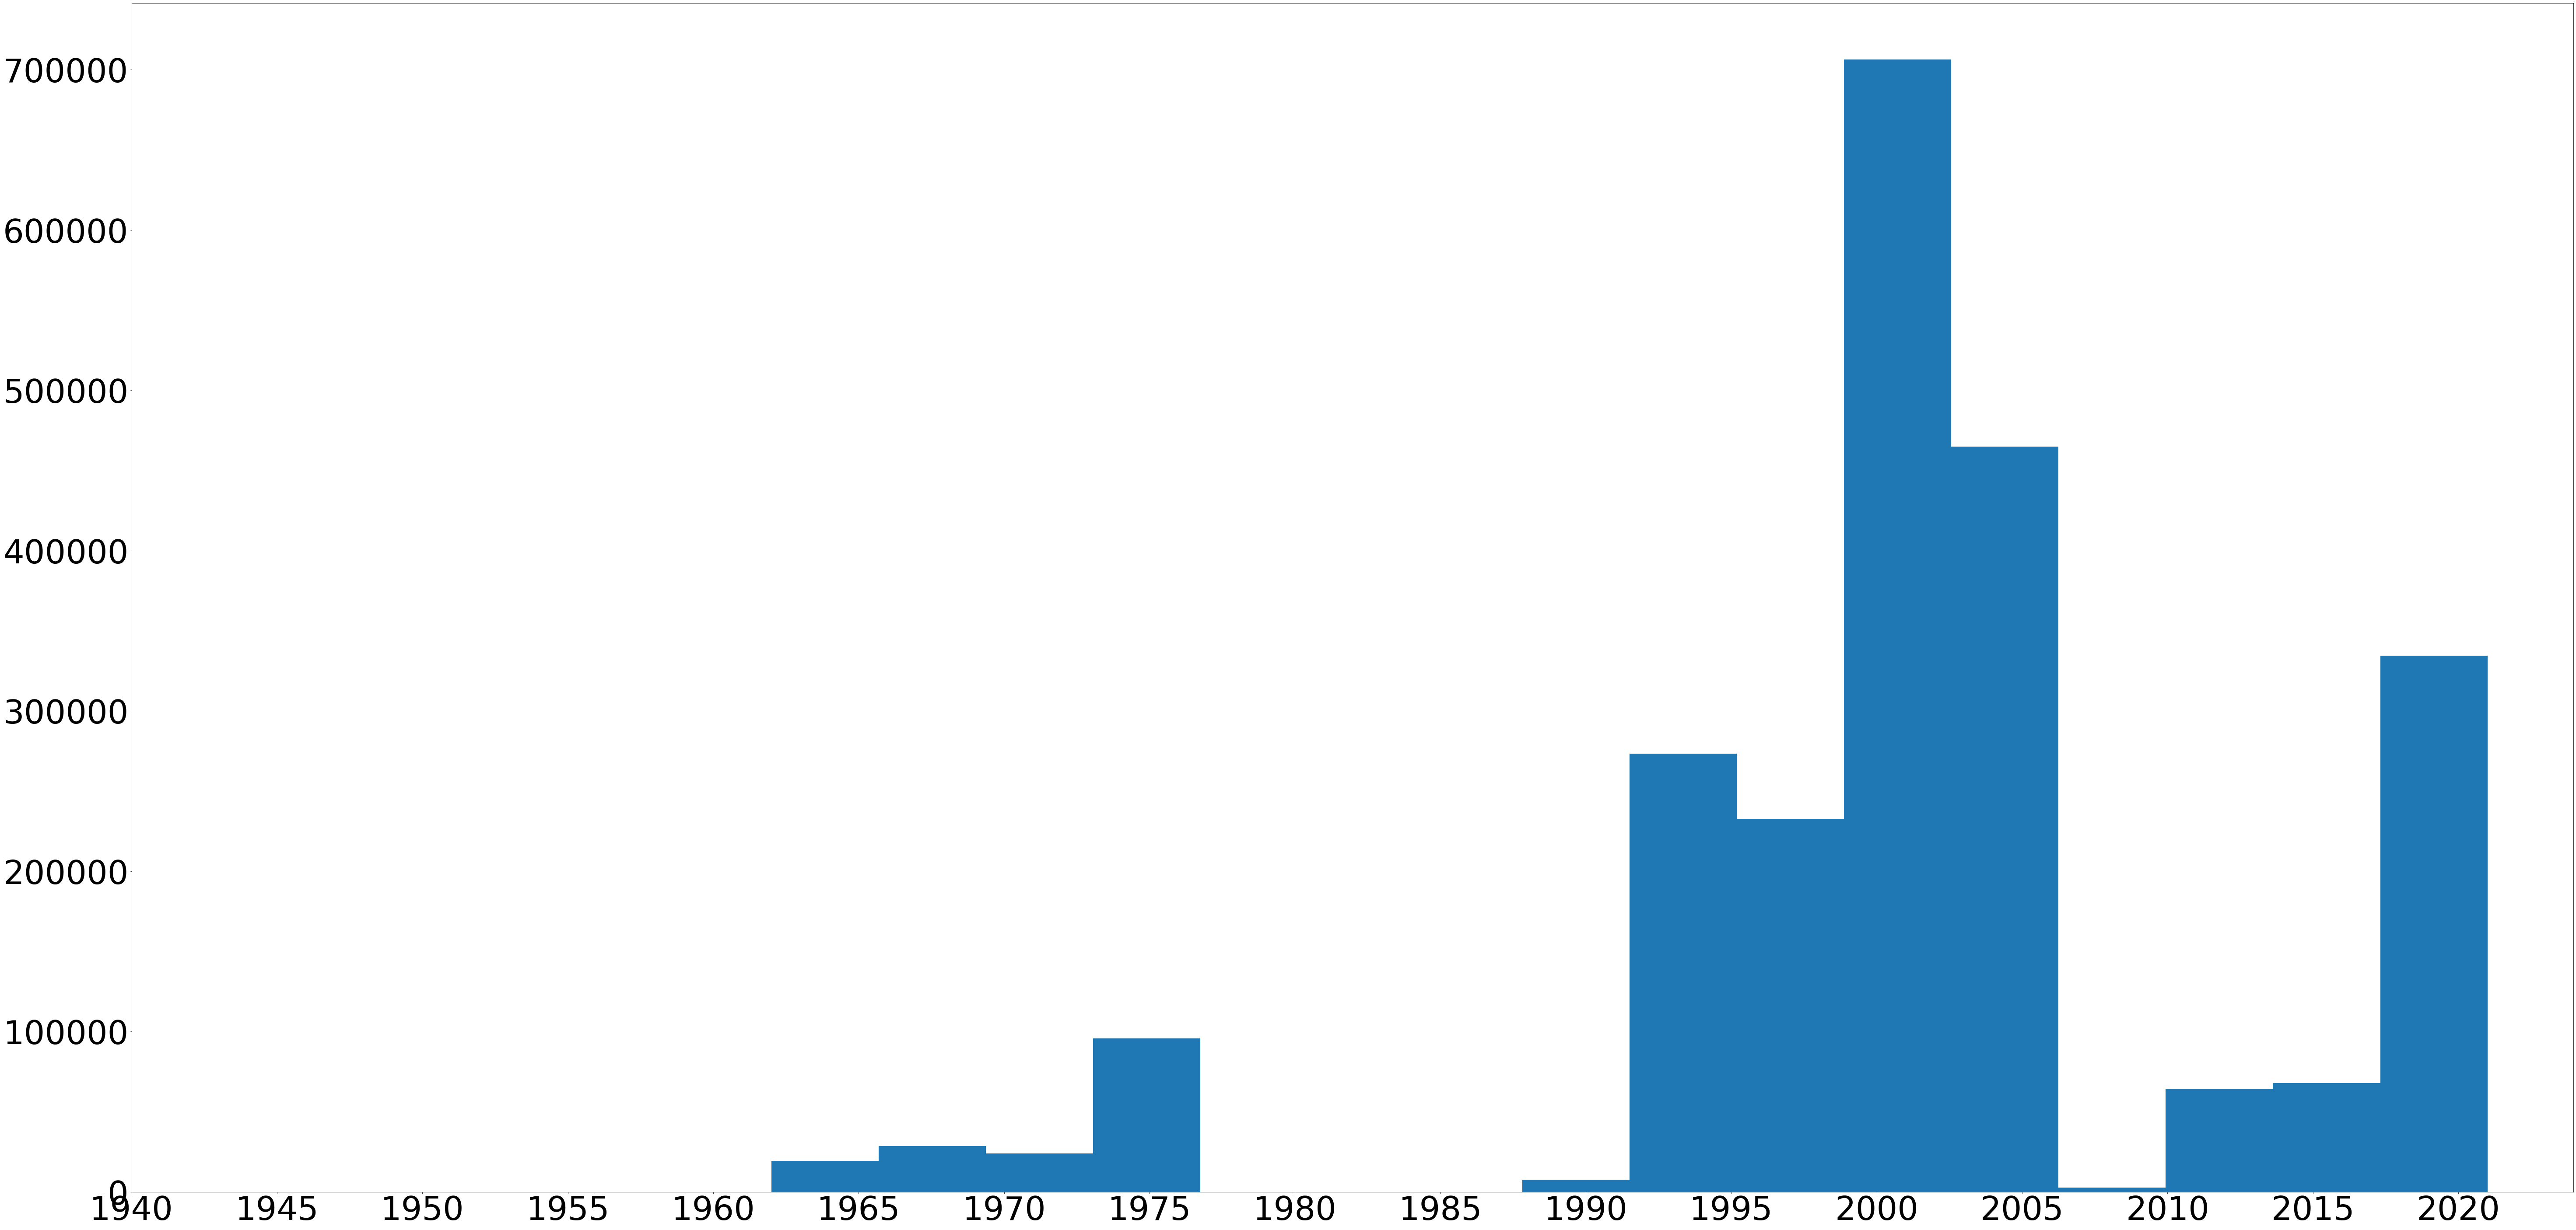

In [21]:
plt.figure(figsize=(100,50))
plt.hist(df["release_year"], bins = 16)
plt.tick_params(axis='both', which='major', labelsize=75)
plt.xticks([i for i in range(1940, 2021, 5)])
plt.show()

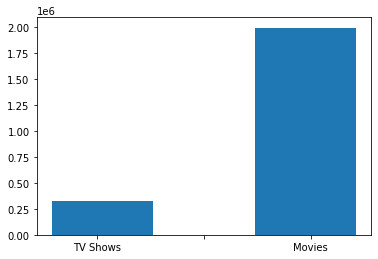

2321442

In [22]:
plt.hist(df["is_movie"], bins=3)
plt.xticks([0.15, 0.5, 0.85], ["TV Shows", '', "Movies"])
plt.show()

df.is_movie.count()

In [23]:
df = df[df["is_movie"]==1]
df.drop(["is_movie"], axis=1, inplace=True)

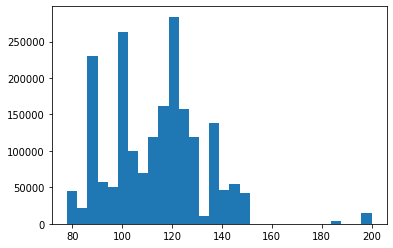

In [24]:
plt.hist(df["duration"], bins=30)
plt.show()

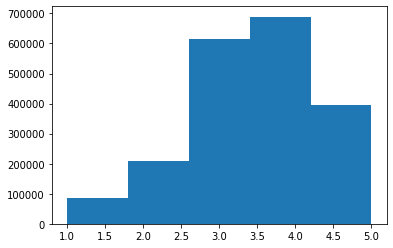

In [25]:
plt.hist(df["user_rating"], bins=5)
plt.show()

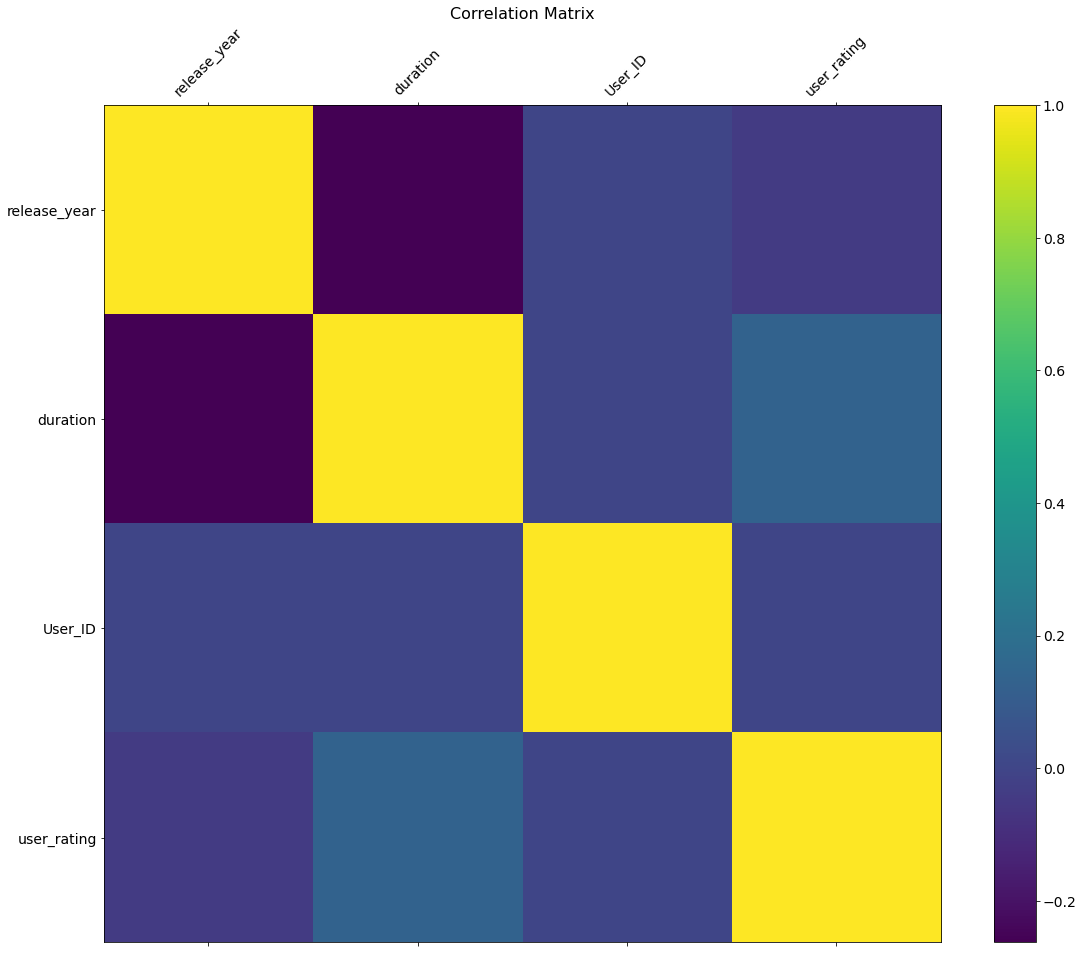

In [26]:
f = plt.figure(figsize=(19, 15))
plt.matshow(df.corr(), fignum=f.number)
plt.xticks(range(df.select_dtypes(['number']).shape[1]), df.select_dtypes(['number']).columns, fontsize=14, rotation=45)
plt.yticks(range(df.select_dtypes(['number']).shape[1]), df.select_dtypes(['number']).columns, fontsize=14)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)
plt.title('Correlation Matrix', fontsize=16);

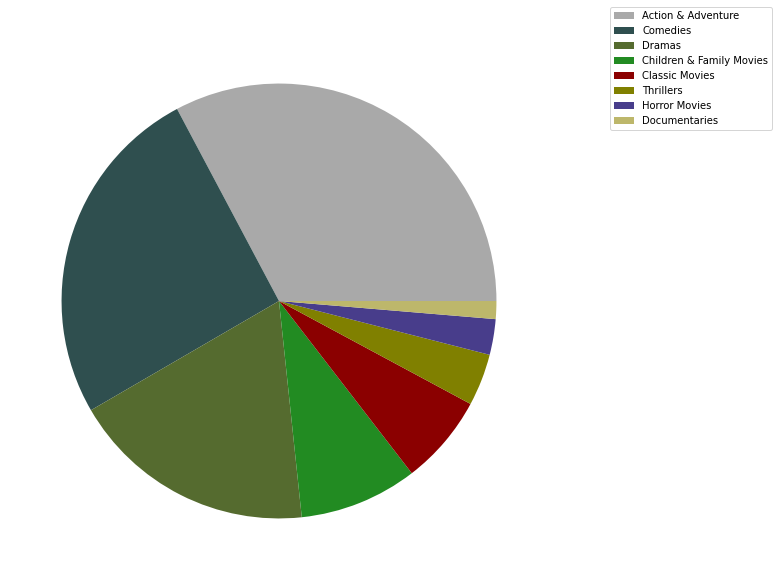

In [27]:
plt.figure(figsize=(10,10))
plt.pie(df.groupby("genres").count().sort_values("title", ascending=False)["title"], colors=['#a9a9a9', '#2f4f4f', '#556b2f', '#228b22', '#8b0000', '#808000', '#483d8b', '#bdb76b', '#008b8b', '#00008b', '#7f007f', '#b03060', '#66cdaa', '#ff4500', '#ffa500', '#ffff00', '#00ff00', '#9400d3', '#00ff7f', '#dc143c', '#00ffff', '#00bfff', '#f4a460', '#0000ff', '#adff2f', '#ff00ff', '#fa8072', '#6495ed', '#dda0dd', '#90ee90', '#ff1493', '#7b68ee', '#afeeee', '#ee82ee', '#ffe4c4', '#ffb6c1'])
ax = plt.subplot()
ax.legend(df.groupby("genres").count().sort_values("title", ascending=False).index, bbox_to_anchor=(1.1, 1.05))
plt.show()

In [28]:
df_category_count = df.groupby("genres").count().sort_values("title", ascending=False)
max_30 = df_category_count["title"][0:30]
max_30

genres
Action & Adventure          652673
Comedies                    509990
Dramas                      364427
Children & Family Movies    174944
Classic Movies              133333
Thrillers                    77070
Horror Movies                52789
Documentaries                26508
Name: title, dtype: int64

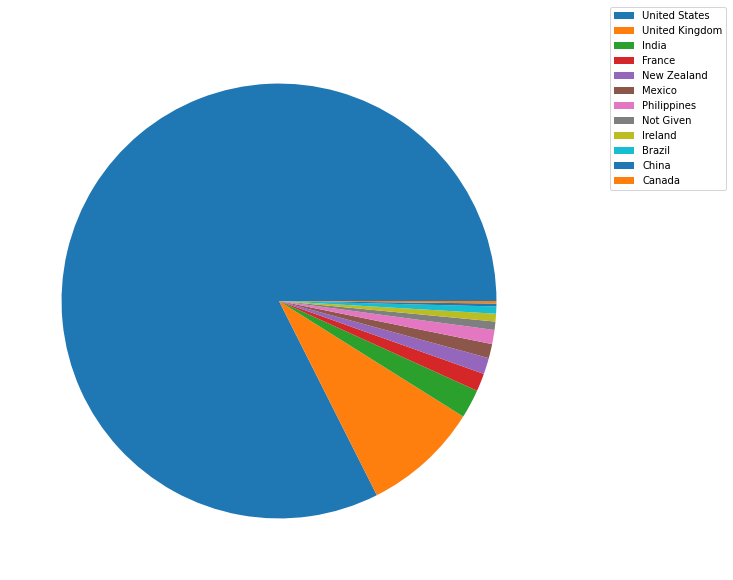

In [29]:
country_count = df.groupby("country").count().sort_values("title", ascending=False)
plt.figure(figsize=(10,10))
plt.pie(country_count["title"].iloc[0:30], colors=['#a9a9a9', '#2f4f4f', '#556b2f', '#228b22', '#8b0000', '#808000', '#483d8b', '#bdb76b', '#008b8b', '#00008b', '#7f007f', '#b03060', '#66cdaa', '#ff4500', '#ffa500', '#ffff00', '#00ff00', '#9400d3', '#00ff7f', '#dc143c', '#00ffff', '#00bfff', '#f4a460', '#0000ff', '#adff2f', '#ff00ff', '#fa8072', '#6495ed', '#dda0dd', '#90ee90', '#ff1493', '#7b68ee', '#afeeee', '#ee82ee', '#ffe4c4', '#ffb6c1'].reverse())
ax = plt.subplot()
ax.legend(country_count['title'].iloc[0:30].index, bbox_to_anchor=(1.1, 1.05))
plt.show()


In [30]:
country_count['title'].iloc[0:30]

country
United States     1641778
United Kingdom     172355
India               42697
France              26509
New Zealand         24117
Mexico              20982
Philippines         20869
Not Given           12368
Ireland             11473
Brazil              10614
China                4297
Canada               3675
Name: title, dtype: int64

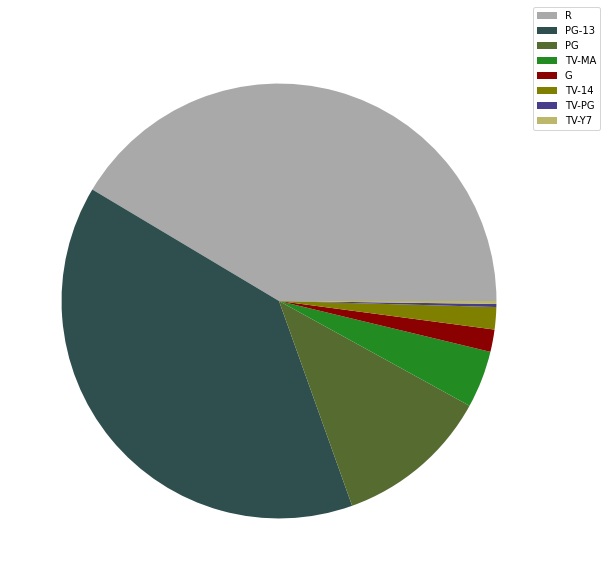

In [31]:
plt.figure(figsize=(10,10))
plt.pie(df.groupby("rating").count().sort_values("title", ascending=False)["title"], colors=['#a9a9a9', '#2f4f4f', '#556b2f', '#228b22', '#8b0000', '#808000', '#483d8b', '#bdb76b', '#008b8b', '#00008b', '#7f007f', '#b03060', '#66cdaa', '#ff4500', '#ffa500', '#ffff00', '#00ff00', '#9400d3', '#00ff7f', '#dc143c', '#00ffff', '#00bfff', '#f4a460', '#0000ff', '#adff2f', '#ff00ff', '#fa8072', '#6495ed', '#dda0dd', '#90ee90', '#ff1493', '#7b68ee', '#afeeee', '#ee82ee', '#ffe4c4', '#ffb6c1'])
ax = plt.subplot()
ax.legend(df.groupby("rating").count().sort_values("title", ascending=False).index, bbox_to_anchor=(1.1, 1.05))
plt.show()

In [34]:
df.head()

,title,director,country,release_year,rating,duration,listed_in,User_ID,user_rating,genres
0,Jaws,Steven Spielberg,United States,1975,PG,124,"Action & Adventure, Classic Movies, Dramas",1943087,2,Action & Adventure
1,Jaws,Steven Spielberg,United States,1975,PG,124,"Action & Adventure, Classic Movies, Dramas",2423875,4,Action & Adventure
2,Jaws,Steven Spielberg,United States,1975,PG,124,"Action & Adventure, Classic Movies, Dramas",1734805,4,Action & Adventure
3,Jaws,Steven Spielberg,United States,1975,PG,124,"Action & Adventure, Classic Movies, Dramas",364518,4,Action & Adventure
4,Jaws,Steven Spielberg,United States,1975,PG,124,"Action & Adventure, Classic Movies, Dramas",1392773,4,Action & Adventure
